# Importing functions

In [1]:
from backend import (get_dataframe, group_dataframe, show_flowchart,
                     filter_dict_by_dfg, get_start_end_activities,
                     frequency_dfg, show_conformance, add_activity_id,
                     add_activity_suffix, remove_suffix_if_grouped,
                     remove_events)
import pm4py

In [2]:
cluster_activities = [
	(3, "Decisão", 1),
	(11009, "Despacho", 1),
	(193, "Julgamento", 1),
	(14092, "Voto", 1),
	(12430, "Arquivamento", 3),
	(228, "Arquivamento", 3),
]

## Análise base

In [3]:
base_df = get_dataframe('./data/civel_18006.csv')
sa_dfg, ea_dfg = get_start_end_activities(base_df)

/root/JuMP-Research/pre_processing/backend/eventlog.py:28: CategoricalRemappingWarning: Local categoricals have different encodings, expensive re-encoding is done to perform this merge operation. Consider using a StringCache or an Enum type if the categories are known in advance
  dataframe = dataframe.with_columns([


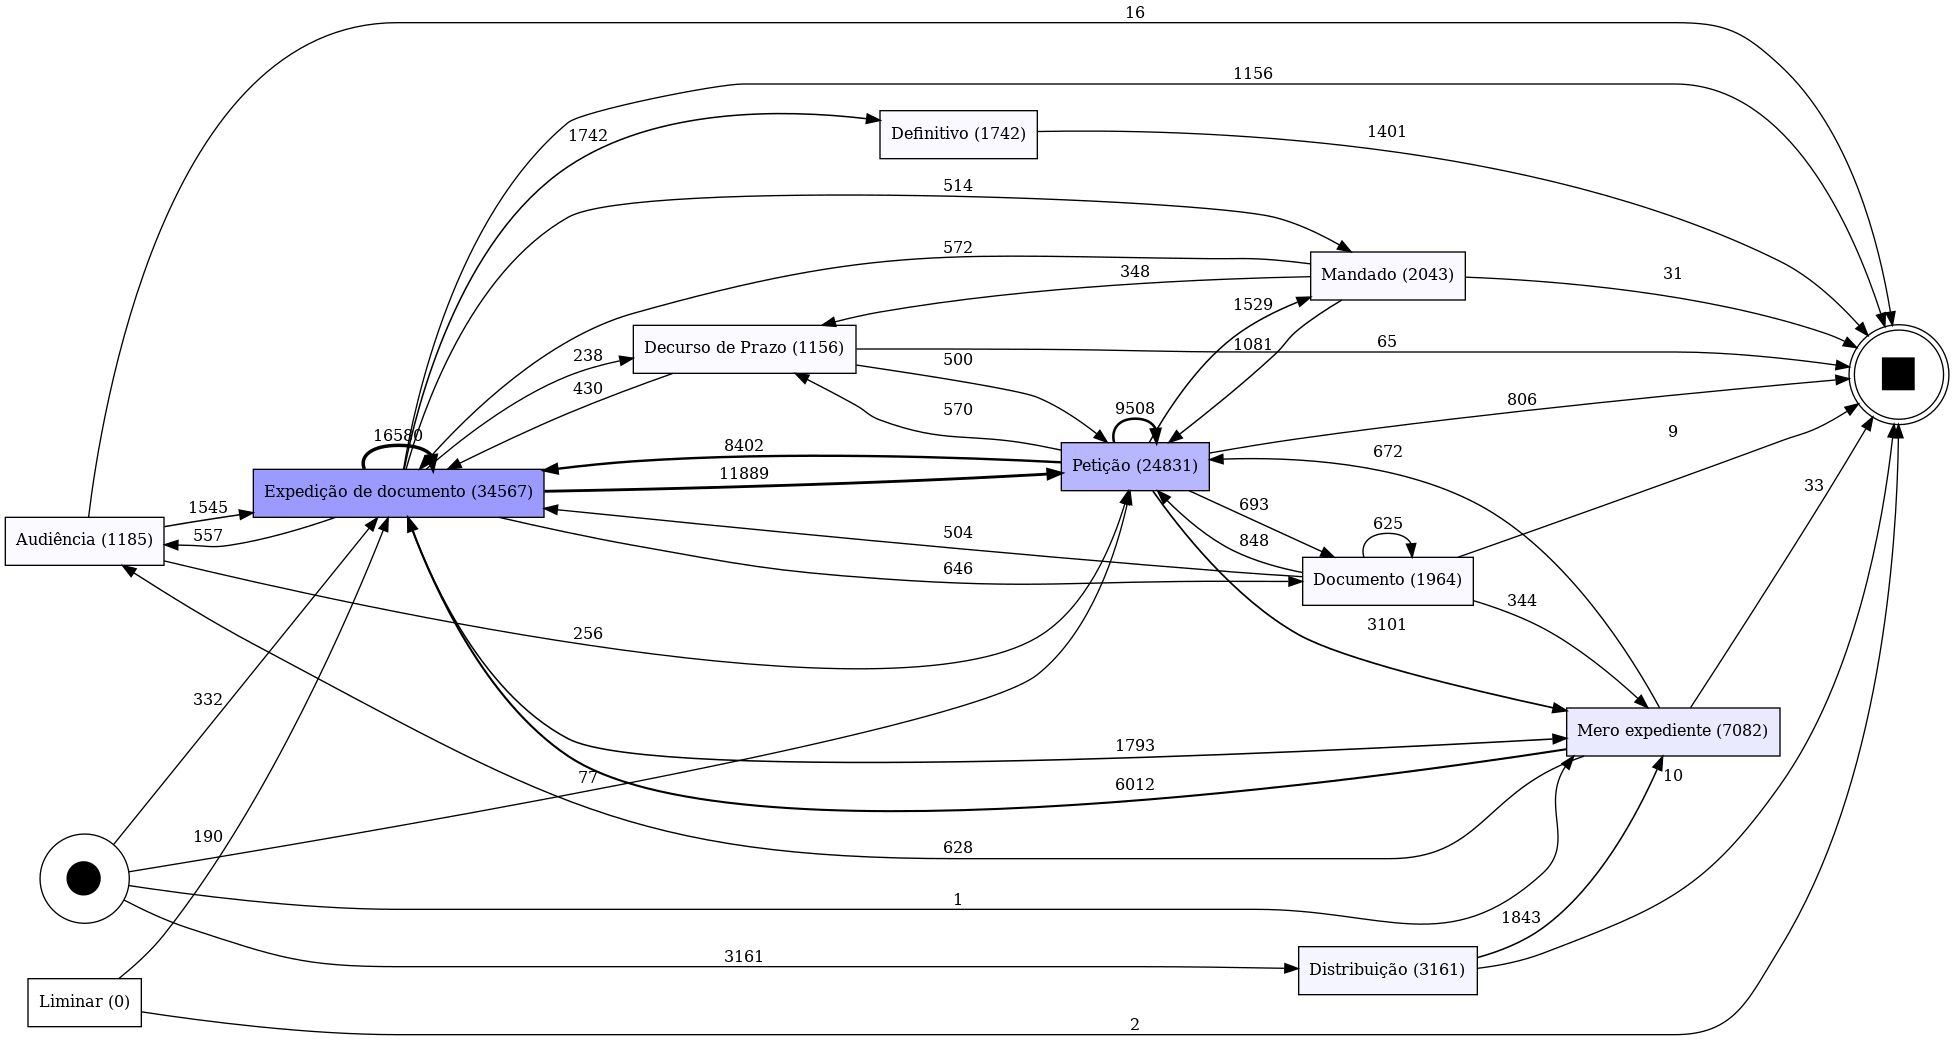

In [4]:
jump_dfg = frequency_dfg(base_df, 30)
filtered_ea_dfg = filter_dict_by_dfg(ea_dfg, jump_dfg)
filtered_sa_dfg = filter_dict_by_dfg(sa_dfg, jump_dfg)
pm4py.view_dfg(jump_dfg, filtered_sa_dfg, filtered_ea_dfg)

## Apenas agrupamento

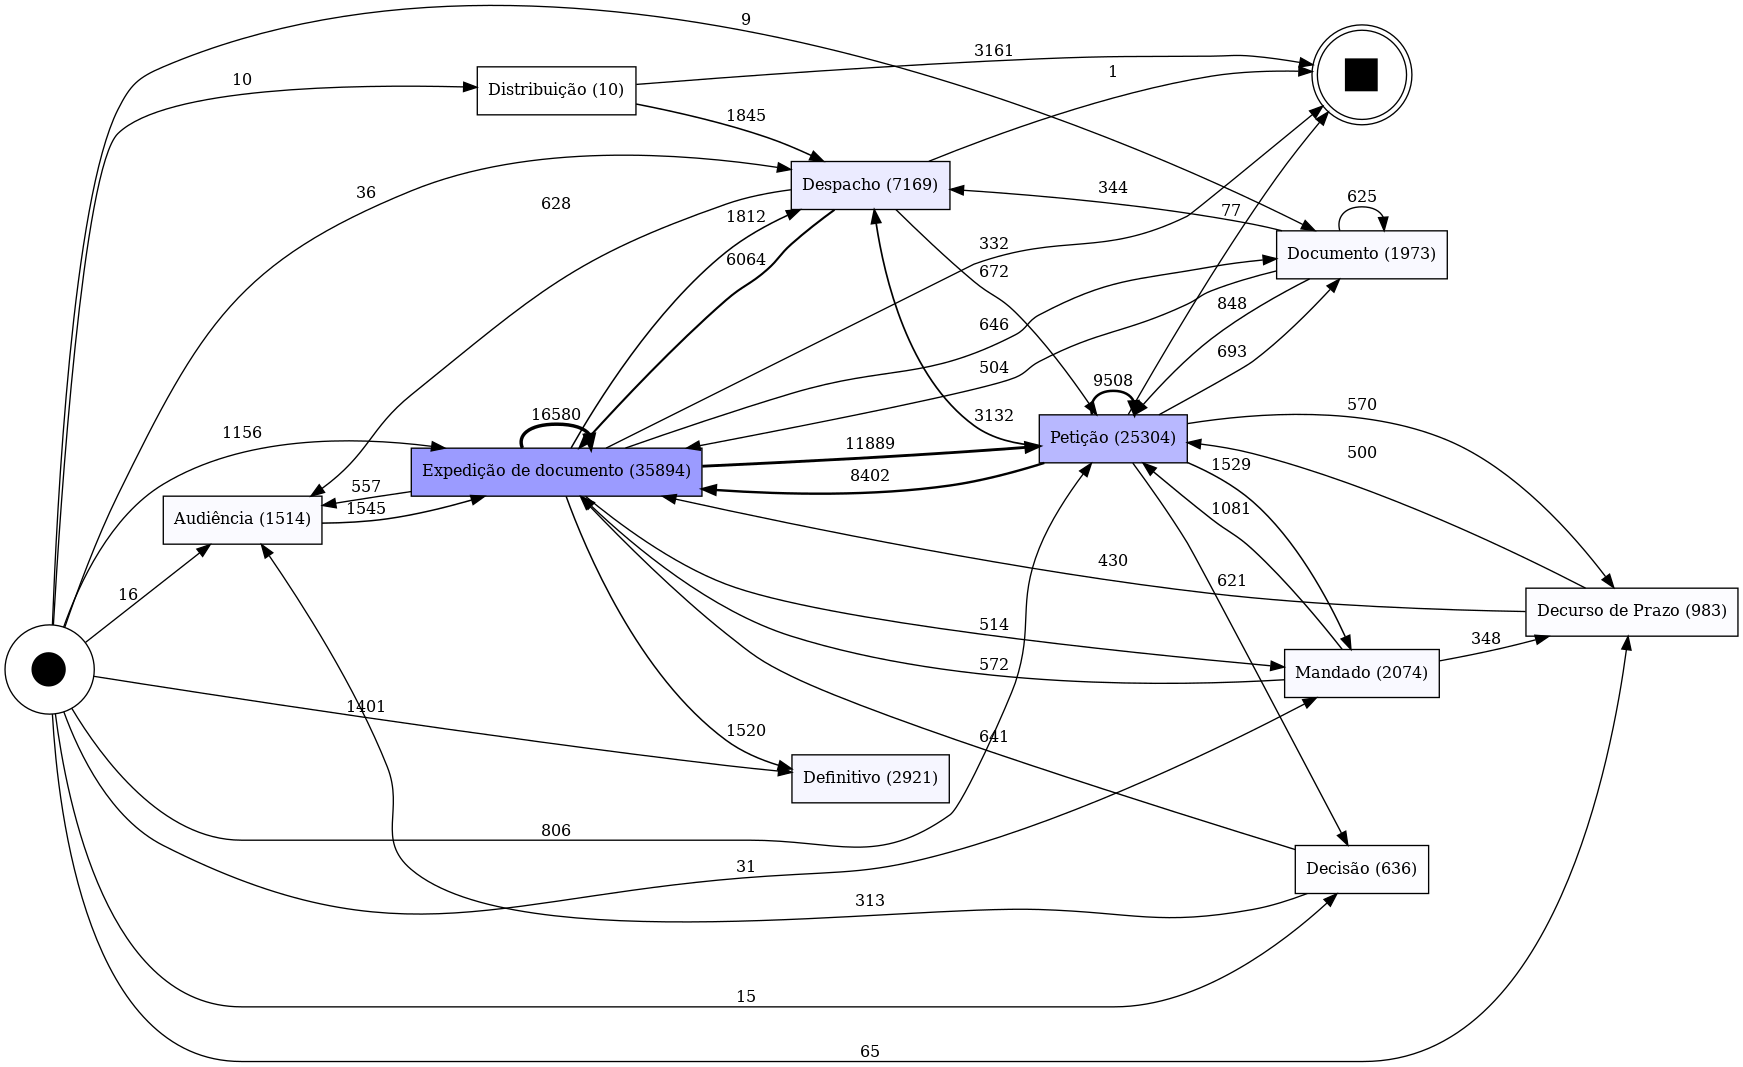

In [4]:
group_df = group_dataframe(base_df, cluster_activities)
sa_group, ea_group = get_start_end_activities(group_df)
show_flowchart(group_df, sa_group, ea_group)

In [7]:
group_dfg = frequency_dfg(group_df, 30)
show_conformance(group_df, group_dfg, sa_group, ea_group)

replaying log with TBR, completed traces :: 100%|██████████| 3313/3313 [00:34<00:00, 96.59it/s]


tbr_percentage_of_fitting_traces    31.982108
tbr_log_fitness                      0.979320
tbr_average_trace_fitness            0.974402
tbr_precision                        0.811440
tbr_generalization                   0.823700
f1_score                             0.885485
dtype: float64

# Group filtered log

In [19]:
remove_list = [
  "Expedição de documento", "Publicação", "Petição",
  "Decurso de Prazo", "Mero expediente", "Conclusão",
  "Disponibilização no Diário da Justiça Eletrônico",
]
filtered_df = remove_events(base_df, remove_list)

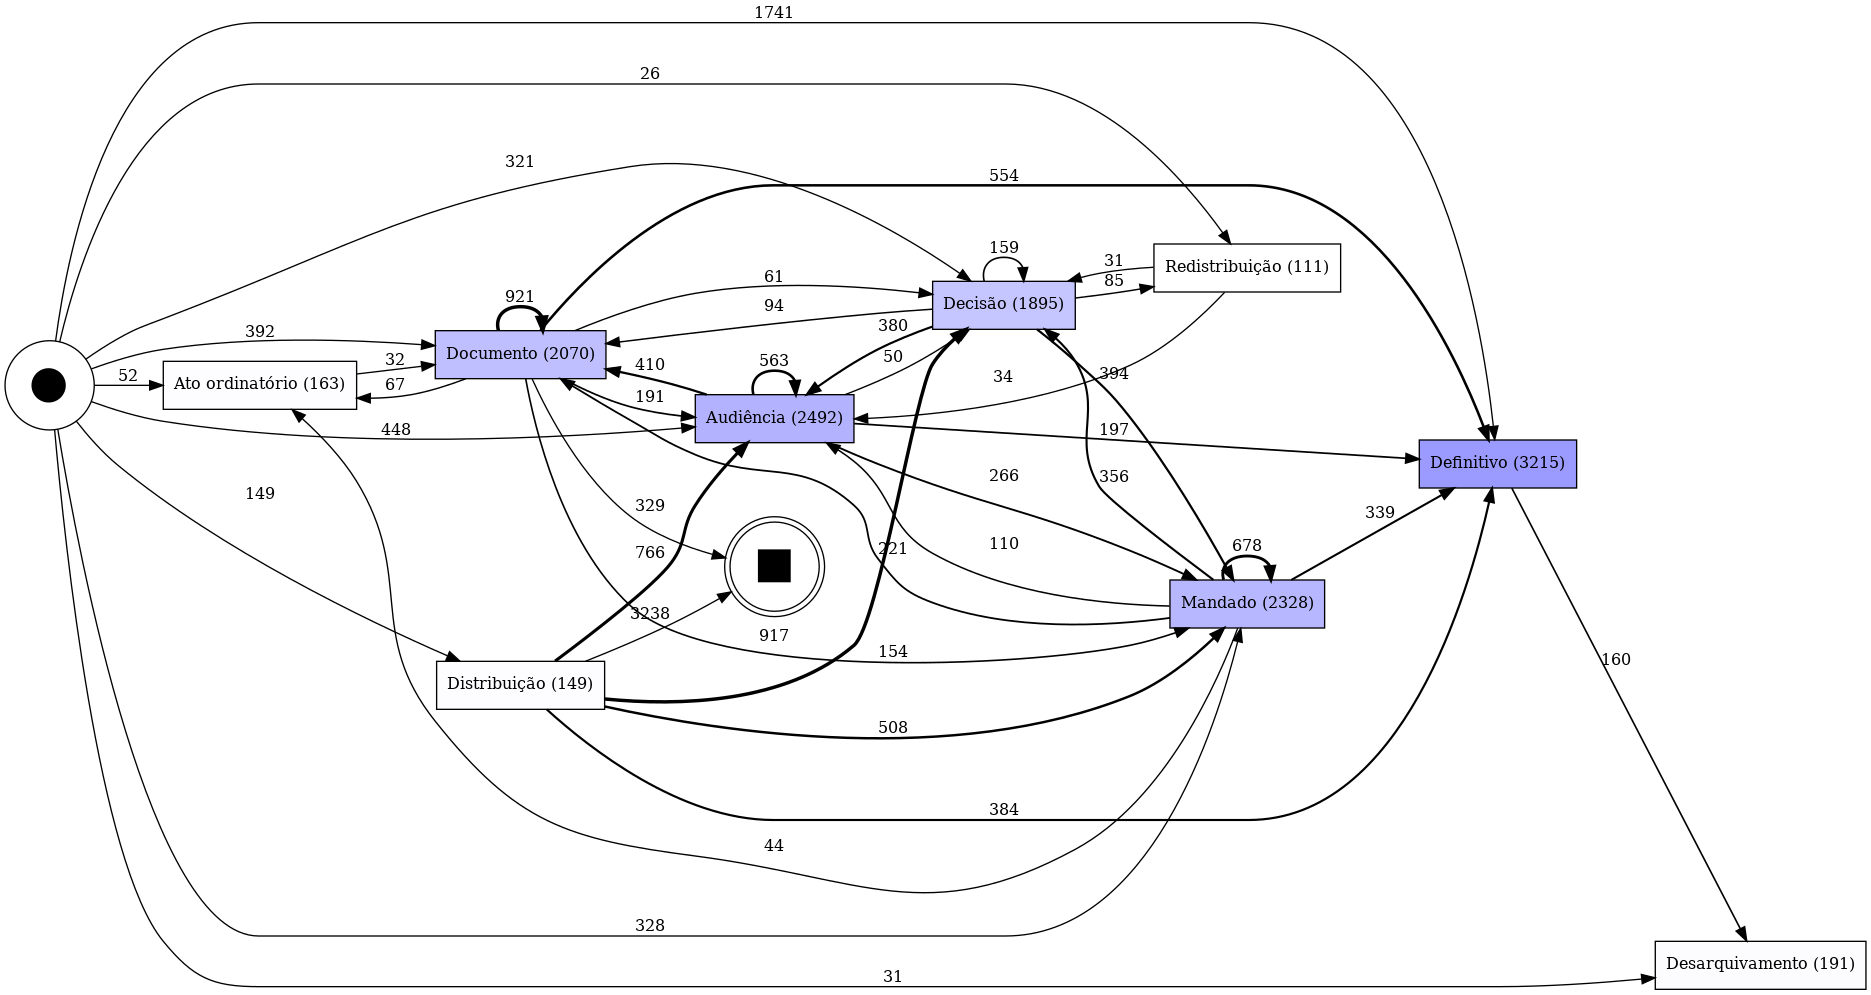

In [20]:
grouped_filtered_df = group_dataframe(filtered_df, cluster_activities)
filtered_sa, filtered_ea = get_start_end_activities(grouped_filtered_df)

show_flowchart(grouped_filtered_df, filtered_sa, filtered_ea)

In [22]:
grouped_filtered_dfg = frequency_dfg(grouped_filtered_df, 30)
filtered_sa = filter_dict_by_dfg(filtered_sa, grouped_filtered_dfg)
filtered_ea = filter_dict_by_dfg(filtered_ea, grouped_filtered_dfg)

show_conformance(grouped_filtered_df, grouped_filtered_dfg, 
                 filtered_sa, filtered_ea)

replaying log with TBR, completed traces :: 100%|██████████| 1096/1096 [00:02<00:00, 508.29it/s]


tbr_percentage_of_fitting_traces    77.439195
tbr_log_fitness                      0.979403
tbr_average_trace_fitness            0.979901
tbr_precision                        0.886582
tbr_generalization                   0.933457
f1_score                             0.930909
dtype: float64

## Group Complemented log

In [6]:
treated_group_df = remove_suffix_if_grouped(group_df, "complemento")
treated_group_df = remove_suffix_if_grouped(treated_group_df, "documento")

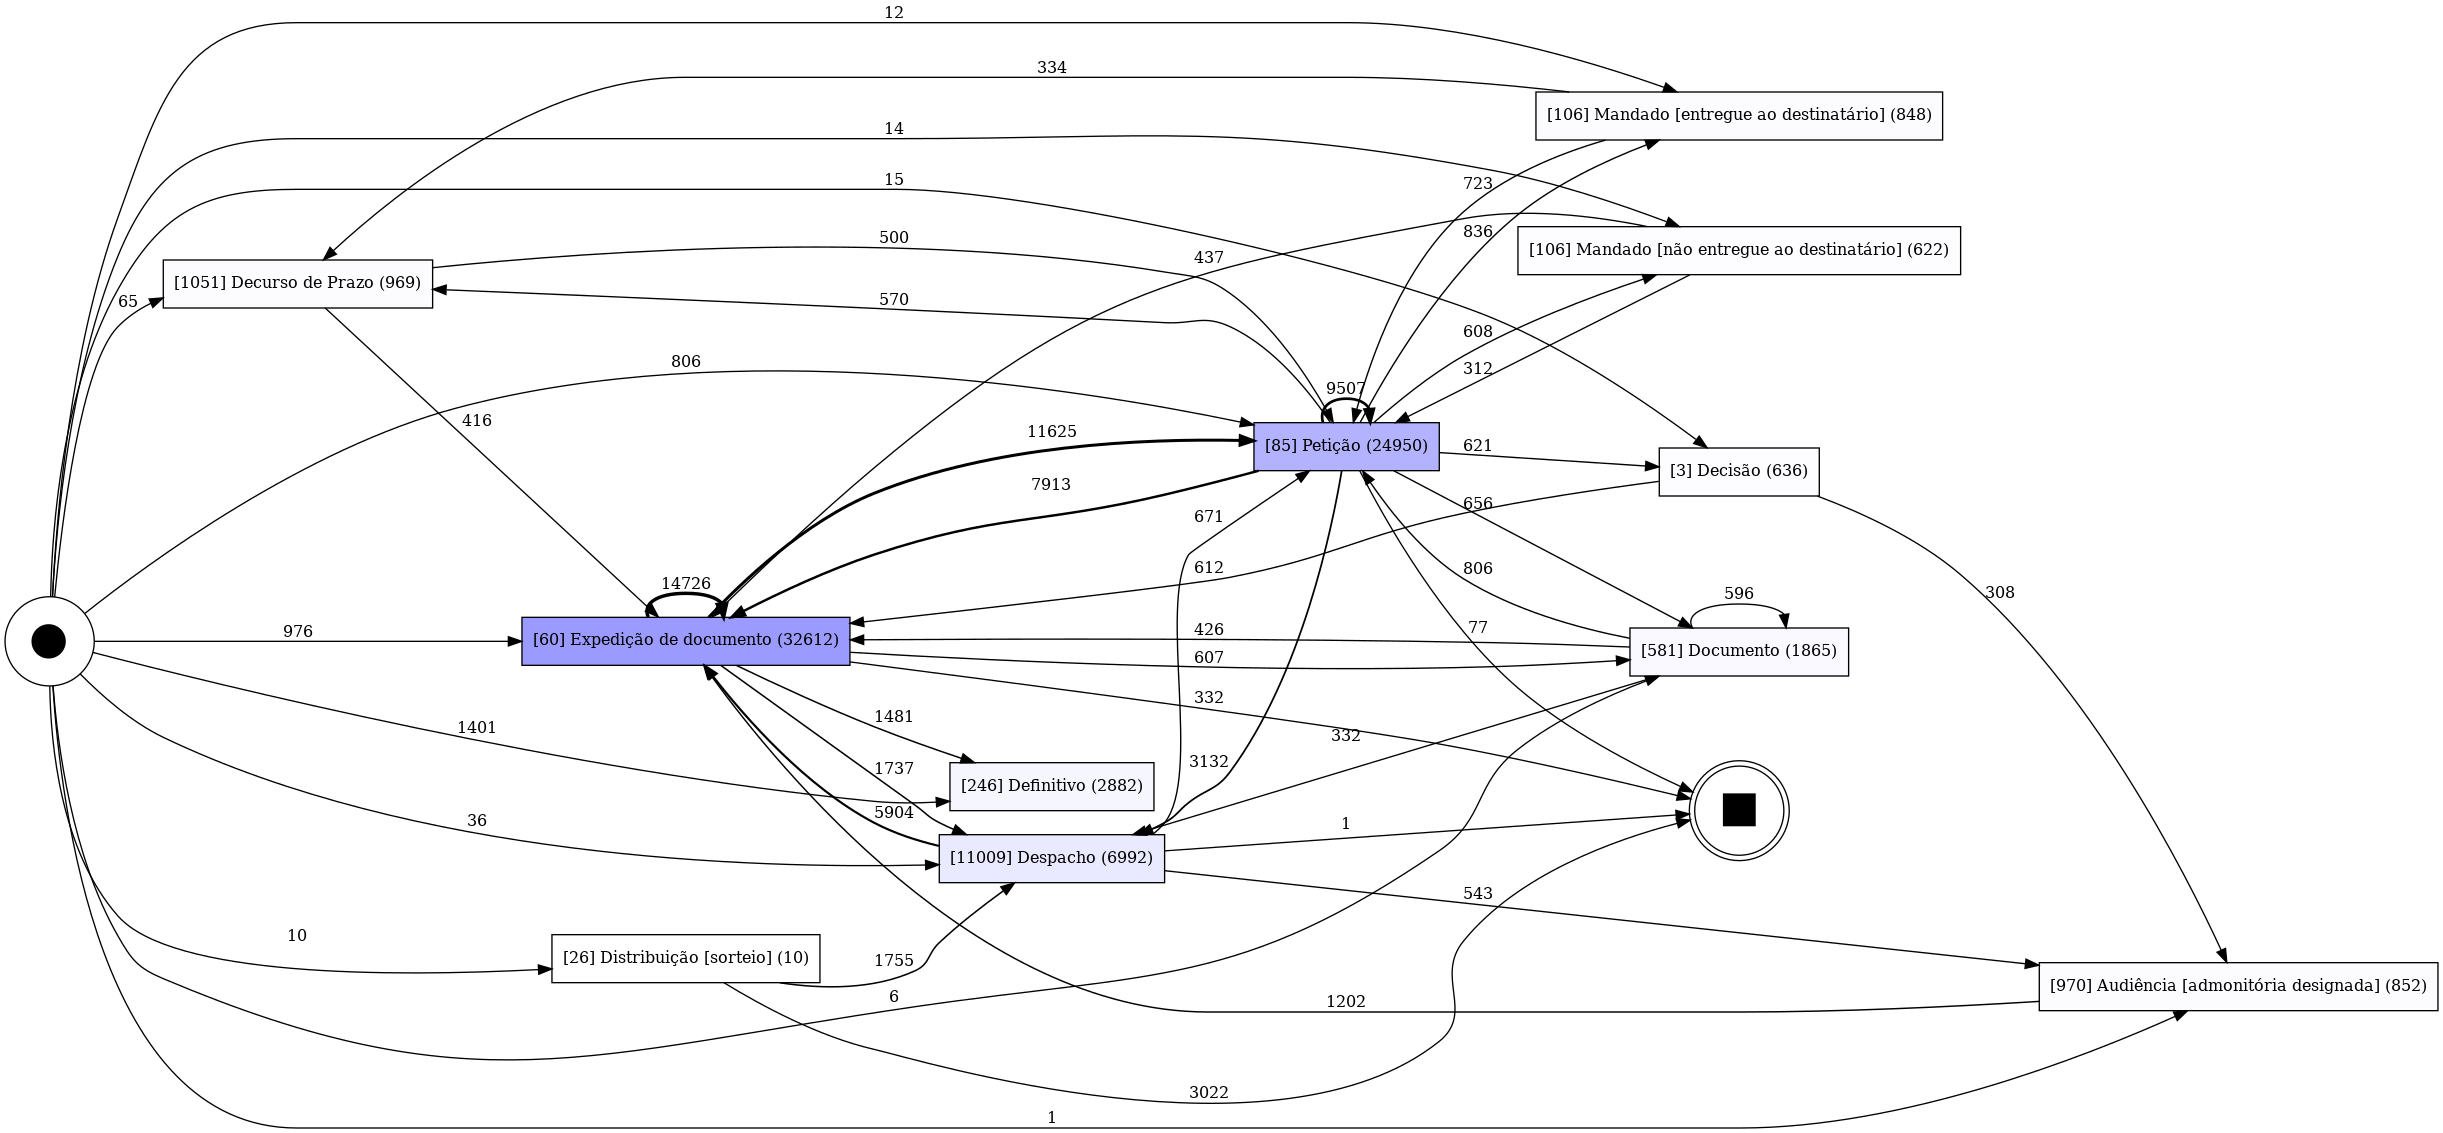

In [14]:
comp_df = add_activity_id(treated_group_df)
comp_df = add_activity_suffix(comp_df, "complemento")
sa_comp, ea_comp = get_start_end_activities(comp_df)

show_flowchart(comp_df, sa_comp, ea_comp)

In [15]:
grouped_comp_dfg = frequency_dfg(comp_df, 30)
show_conformance(comp_df, grouped_comp_dfg, sa_comp, ea_comp)

/root/JuMP-Research/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
replaying log with TBR, completed traces :: 100%|██████████| 3352/3352 [00:27<00:00, 120.20it/s]


tbr_percentage_of_fitting_traces    19.988817
tbr_log_fitness                      0.965940
tbr_average_trace_fitness            0.962119
tbr_precision                        0.887862
tbr_generalization                   0.816570
f1_score                             0.923500
dtype: float64

## Group Documented log

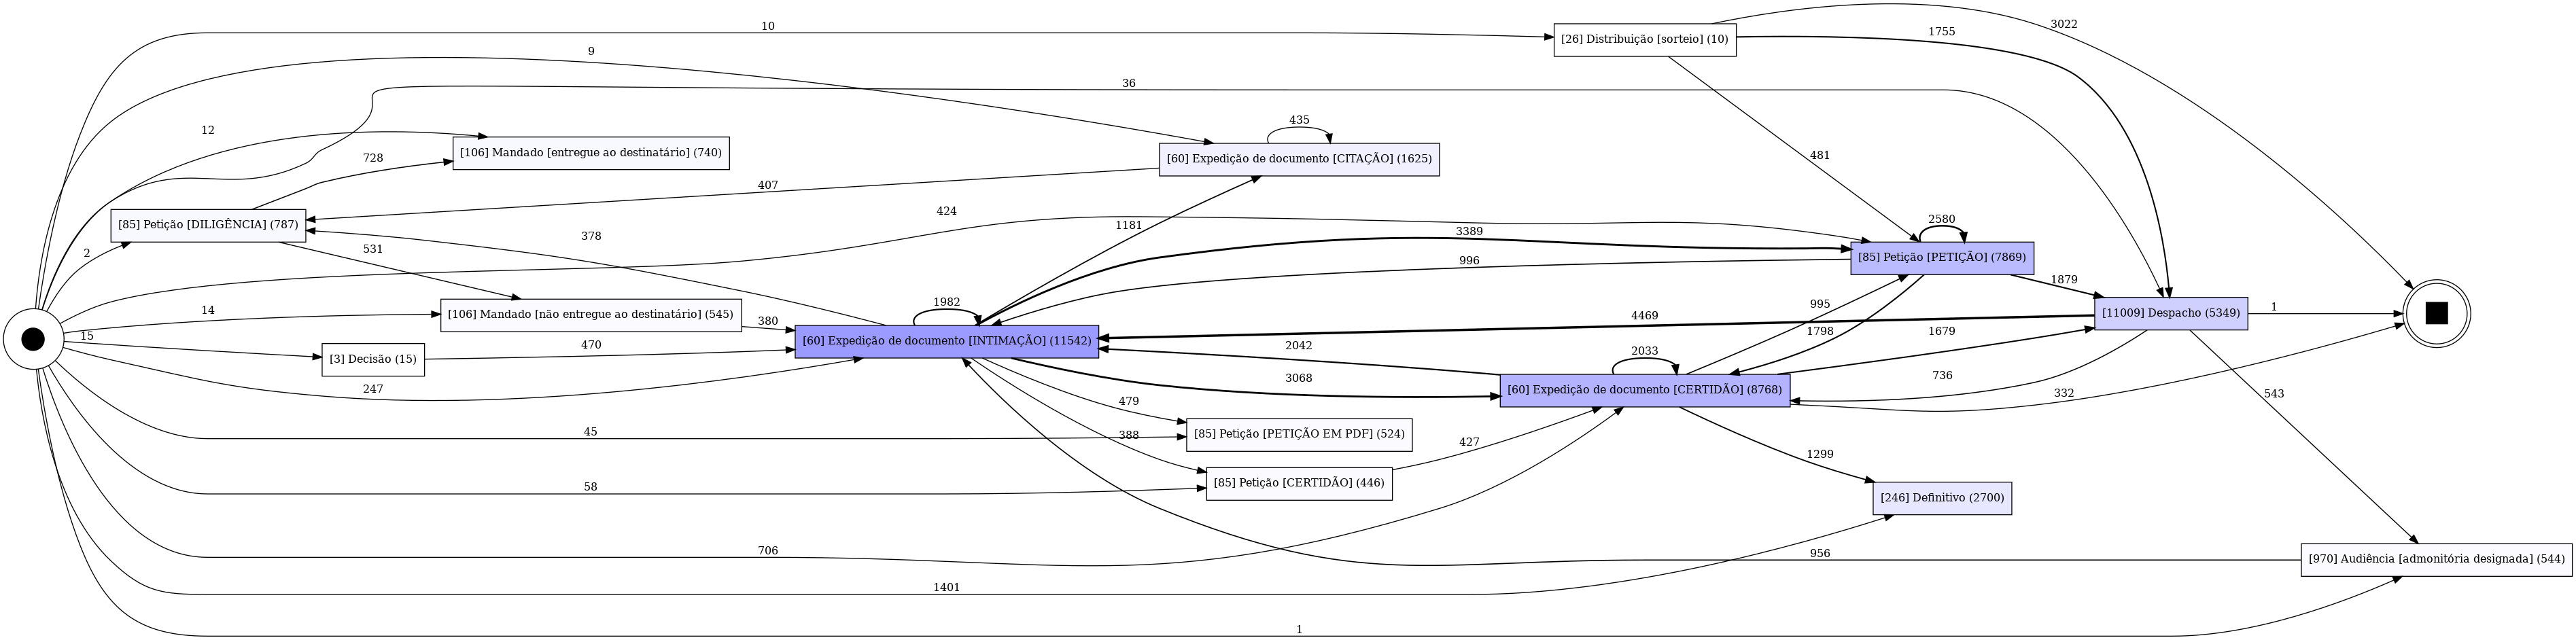

In [16]:
doc_df = add_activity_id(treated_group_df)
doc_df = add_activity_suffix(comp_df, "documento")
sa_doc, ea_doc = get_start_end_activities(doc_df)

show_flowchart(doc_df, sa_doc, ea_doc)

In [17]:
grouped_doc_dfg = frequency_dfg(doc_df, 30)

show_conformance(doc_df, grouped_doc_dfg, sa_doc, ea_doc)

replaying log with TBR, completed traces :: 100%|██████████| 3430/3430 [01:06<00:00, 51.26it/s]


tbr_percentage_of_fitting_traces    3.131115
tbr_log_fitness                     0.840234
tbr_average_trace_fitness           0.845219
tbr_precision                       0.991644
tbr_generalization                  0.649978
f1_score                            0.912595
dtype: float64

## Grouped, filtered, documented and complemented log

In [21]:
treated_group_df = remove_suffix_if_grouped(grouped_filtered_df, "complemento")
treated_group_df = remove_suffix_if_grouped(treated_group_df, "documento")

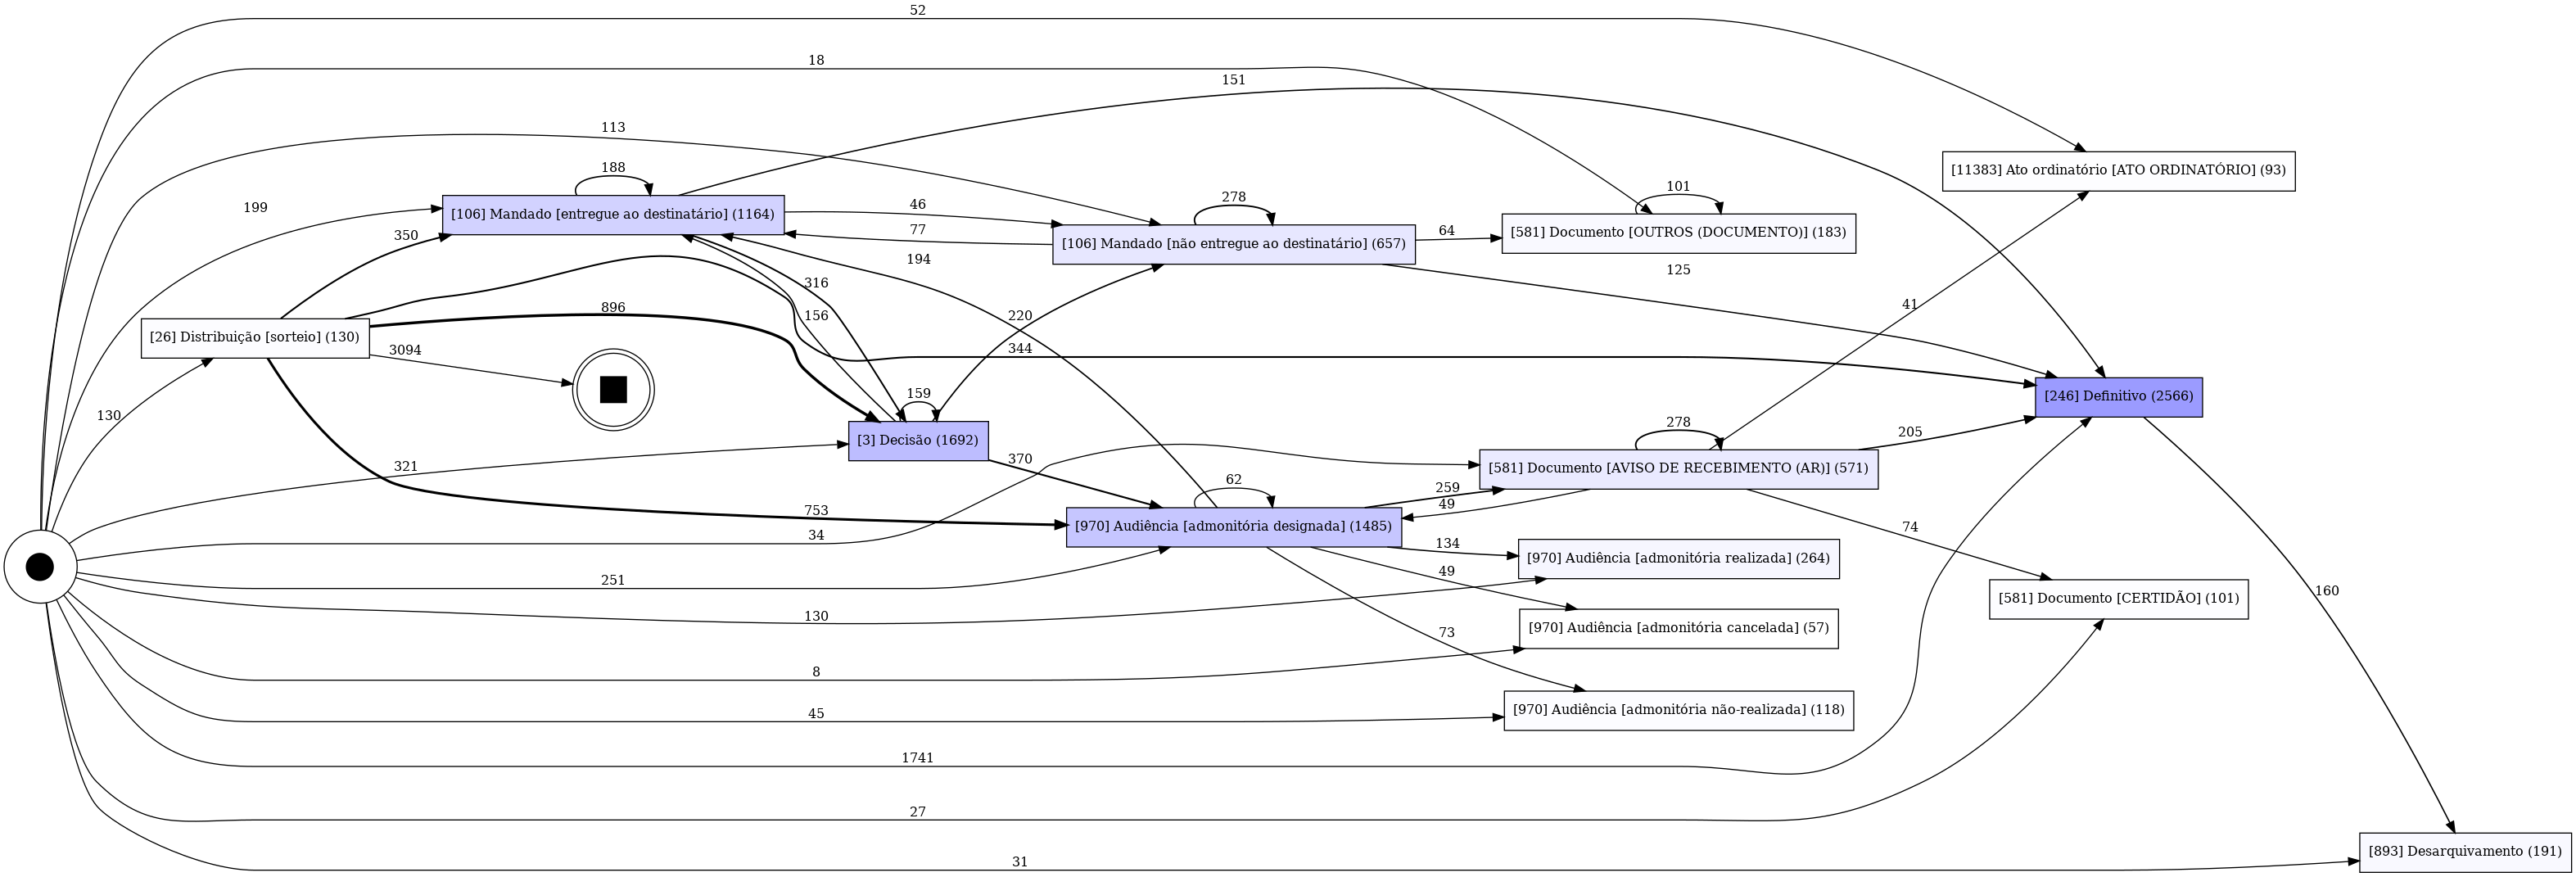

In [22]:
all_df = add_activity_id(treated_group_df)
all_df = add_activity_suffix(all_df, "documento")
all_df = add_activity_suffix(all_df, "complemento")
sa_all, ea_all = get_start_end_activities(all_df)

show_flowchart(all_df, sa_all, ea_all)

In [23]:
all_dfg = frequency_dfg(all_df, 30)

show_conformance(all_df, all_dfg, sa_all, ea_all)

replaying log with TBR, completed traces :: 100%|██████████| 1416/1416 [00:07<00:00, 191.17it/s]


tbr_percentage_of_fitting_traces    42.214146
tbr_log_fitness                      0.909187
tbr_average_trace_fitness            0.917924
tbr_precision                        0.978453
tbr_generalization                   0.725106
f1_score                             0.947222
dtype: float64